# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.Бинарный Классификатор

In [ ]:
file_path = '/content/drive/MyDrive/diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.shape

(253680, 22)

In [ ]:
# Наборов данных который использовались

lis= df.columns
lis = list(lis)
lis.pop(0)
print(len(lis), 'columns')
print()
for i in lis:
  print(i)

21 columns

HighBP
HighChol
CholCheck
BMI
Smoker
Stroke
HeartDiseaseorAttack
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
NoDocbcCost
GenHlth
MentHlth
PhysHlth
DiffWalk
Sex
Age
Education
Income


In [ ]:
#Проверить, нет ли недостающих данных

df.isnull().sum()/df.shape[0]

,0
Diabetes_012,0.0
HighBP,0.0
HighChol,0.0
CholCheck,0.0
BMI,0.0
Smoker,0.0
Stroke,0.0
HeartDiseaseorAttack,0.0
PhysActivity,0.0
Fruits,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df['Diabetes_012'] = df['Diabetes_012'].replace({2 : 1})

In [ ]:
df1 = df.drop_duplicates()

In [ ]:
df1.shape

(229712, 22)

### Разделить набор данных

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(df1.drop(['Diabetes_012'], axis=1), df1['Diabetes_012'],
                                                   train_size=0.7, random_state=77)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.66, random_state=77)

### Первая модель

In [ ]:
binary_classifier = Sequential(
    [
        layers.Dense(4, activation = 'relu', input_dim = X_train.shape[1]),
        layers.Dense(1, activation = 'sigmoid')
    ]
)
binary_classifier.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
binary_classifier.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### Добавить ранние остановки и контрольно-пропускные пункты

In [ ]:
# Останавливаем обучение, если валидационная точность не улучшилась в течение 10 эпох
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    mode='max',
    verbose=1
)

# Сохраняем веса модели, если валидационная точность улучшилась
checkpoint = ModelCheckpoint(
    'cancer_weights-{epoch:02d}-{val_accuracy:.3f}.keras',
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True
)

# Список колбеков, который будет передан в модель
callbacks_list = [early_stop, checkpoint]


In [ ]:
binary_class_history = binary_classifier.fit(X_train, y_train, batch_size = 10, validation_data = (X_valid, y_valid),
                                        callbacks = callbacks_list, epochs = 100)

Epoch 1/100
16067/16080 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8198 - loss: 0.4302
Epoch 1: val_accuracy improved from -inf to 0.82595, saving model to cancer_weights-01-0.826.keras
16080/16080 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.8198 - loss: 0.4302 - val_accuracy: 0.8259 - val_loss: 0.3906
Epoch 2/100
16062/16080 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8278 - loss: 0.3885
Epoch 2: val_accuracy improved from 0.82595 to 0.83333, saving model to cancer_weights-02-0.833.keras
16080/16080 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8278 - loss: 0.3885 - val_accuracy: 0.8333 - val_loss: 0.3804
Epoch 3/100
16074/16080 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8315 - loss: 0.3813
Epoch 3: val_accuracy did not improve from 0.83333
16080/16080 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.8315 - loss: 0.3813 - val_accuracy: 0.8309 - val_loss: 0.3816
Epoch 4/100
16047/16080 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8307 - loss: 0.3821
Epoch 4: val_accur

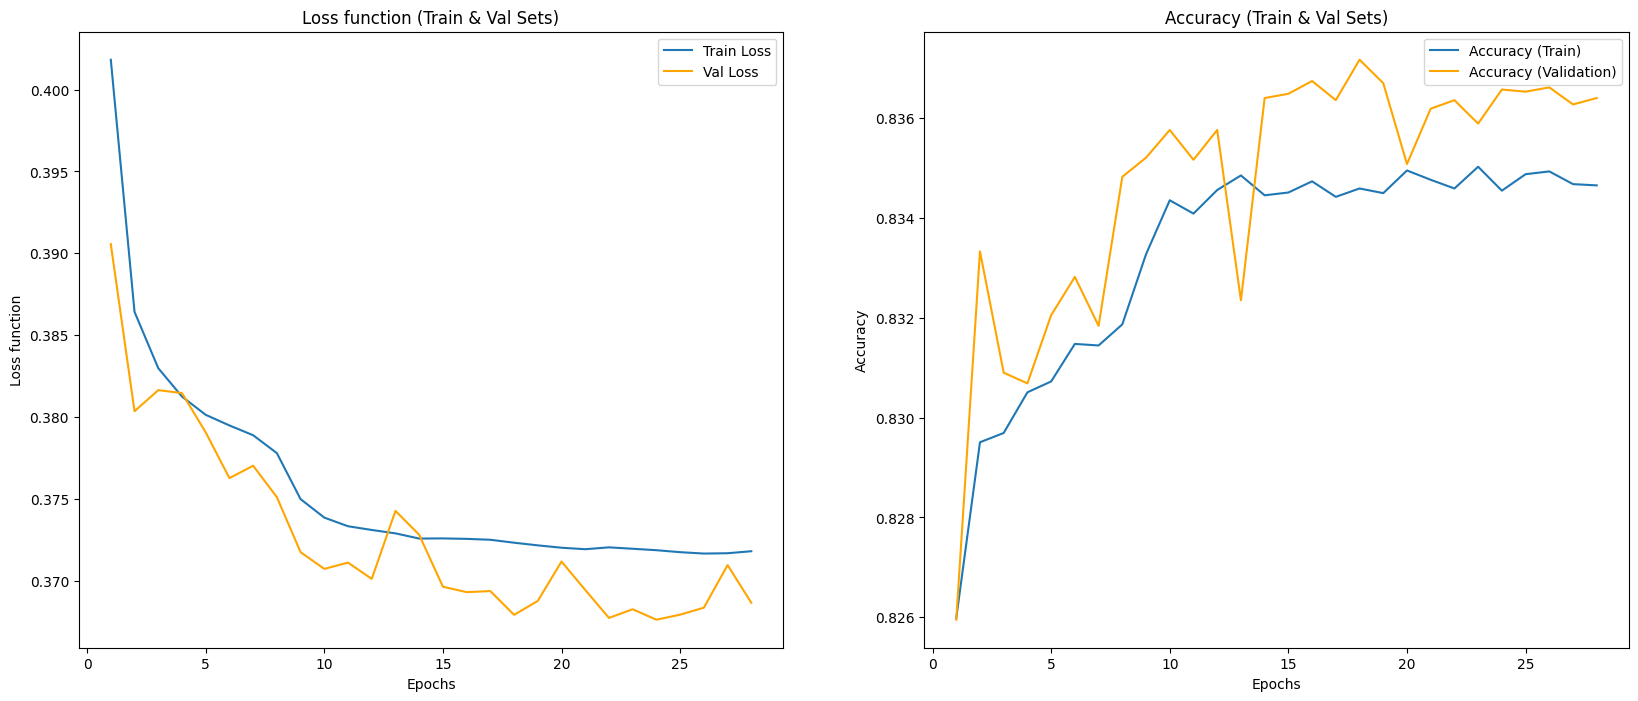

In [ ]:
plt.figure(figsize=(20,8))
loss_function = binary_class_history.history['loss']
val_loss_function = binary_class_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

acc = binary_class_history.history['accuracy']
val_acc = binary_class_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.subplot(1, 2, 1)
plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
probs = binary_classifier.predict(X_test)[:,0]
truth = y_test

1422/1422 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
preds = (probs>0.5).astype(int)
preds

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
df_metrics = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
recall = round(recall_score(truth, preds), 4)
precision = round(precision_score(truth, preds), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, preds), 4)
auc = round(roc_auc_score(truth, probs), 4)
df_metrics.loc[len(df_metrics.index)] = ['base_model', recall, precision, weighted_accuracy, auc]

### Model, Recall, Precision, weighted_accuracy, AUC

In [ ]:
df_metrics

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.2355,0.5384,0.5973,0.802


### Вторая модель

In [ ]:
binary_classifier_2 = Sequential(
    [
        layers.Dense(4, activation = 'relu', input_dim = X_train.shape[1]),
        layers.Dense(4, activation = 'sigmoid'),
        layers.Dense(4, activation = 'relu'),
        layers.Dense(4, activation = 'sigmoid'),
        layers.Dense(2, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid')
    ]
)
binary_classifier_2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 4)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
binary_classifier_2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 10, mode = 'max', verbose =1)
checkpoint = ModelCheckpoint('cancer2_weights-{epoch:02d}-{val_accuracy:.3f}.keras',
                             monitor = 'val_accuracy', verbose = 1, mode = 'max',
                             save_best_only = True)
callbacks_list = [early_stop,checkpoint]

In [ ]:
binary_class_history = binary_classifier_2.fit(X_train, y_train, batch_size = 10, validation_data = (X_valid, y_valid),
                                        callbacks = callbacks_list, epochs = 100)

Epoch 1/100
16059/16080 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7866 - loss: 0.4928
Epoch 1: val_accuracy improved from -inf to 0.83047, saving model to cancer2_weights-01-0.830.keras
16080/16080 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.7867 - loss: 0.4927 - val_accuracy: 0.8305 - val_loss: 0.3813
Epoch 2/100
16075/16080 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8306 - loss: 0.3818
Epoch 2: val_accuracy improved from 0.83047 to 0.83321, saving model to cancer2_weights-02-0.833.keras
16080/16080 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.8305 - loss: 0.3818 - val_accuracy: 0.8332 - val_loss: 0.3745
Epoch 3/100
16075/16080 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8316 - loss: 0.3780
Epoch 3: val_accuracy improved from 0.83321 to 0.83372, saving model to cancer2_weights-03-0.834.keras
16080/16080 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8316 - loss: 0.3780 - val_accuracy: 0.8337 - val_loss: 0.3717
Epoch 4/100
16064/16080 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

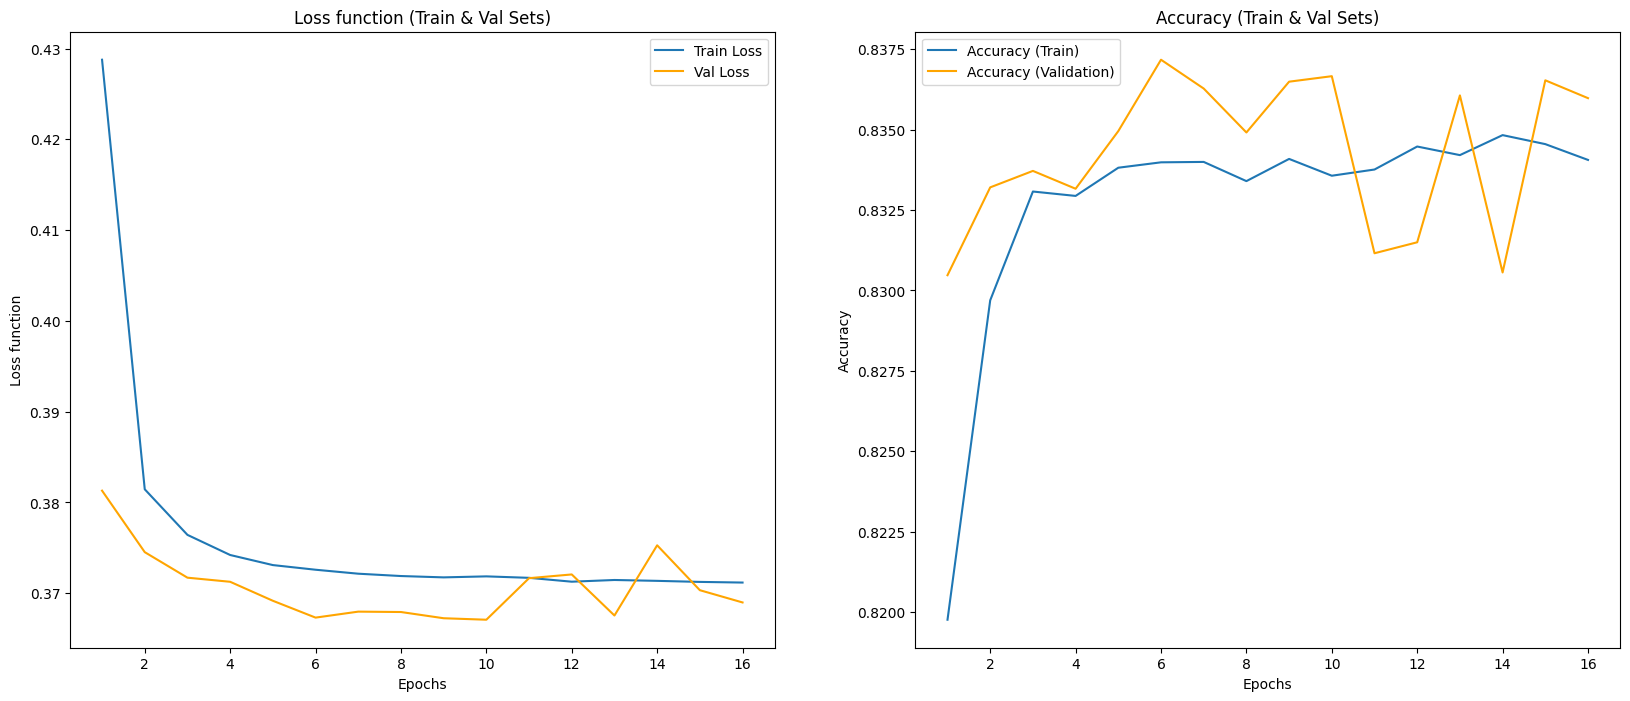

In [ ]:
plt.figure(figsize=(20,8))
loss_function = binary_class_history.history['loss']
val_loss_function = binary_class_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

acc = binary_class_history.history['accuracy']
val_acc = binary_class_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.subplot(1, 2, 1)
plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
probs = binary_classifier_2.predict(X_test)[:,0]
truth = y_test

1422/1422 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
preds = (probs>0.5).astype(int)
preds

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
recall = round(recall_score(truth, preds), 4)
precision = round(precision_score(truth, preds), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, preds), 4)
auc = round(roc_auc_score(truth, probs), 4)
df_metrics.loc[len(df_metrics.index)] = ['seсond_model', recall, precision, weighted_accuracy, auc]

### model,recall,precision,weighted_accuracy,auc

In [ ]:
df_metrics

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.2355,0.5384,0.5973,0.8020
1,seсond_model,0.2316,0.5464,0.5963,0.8033


## 2.Многоклассовый классификатор

In [ ]:
file_path = '/content/drive/MyDrive/bodyPerformance.csv'
df = pd.read_csv(file_path)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
df.shape

(13393, 12)

In [ ]:
# Наборов данных который использовались

lis= df.columns
lis = list(lis)
lis.pop(0)
print(len(lis), 'columns')
print()
for i in lis:
  print(i)

11 columns

gender
height_cm
weight_kg
body fat_%
diastolic
systolic
gripForce
sit and bend forward_cm
sit-ups counts
broad jump_cm
class


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()/df.shape[0]

,0
age,0.0
gender,0.0
height_cm,0.0
weight_kg,0.0
body fat_%,0.0
diastolic,0.0
systolic,0.0
gripForce,0.0
sit and bend forward_cm,0.0
sit-ups counts,0.0


In [ ]:
print(df['class'].unique())

['C' 'A' 'B' 'D']


In [ ]:
df['gender'] = df['gender'].replace({'M' : 1, 'F' : 0})
df = df.rename(columns={'gender' : 'is_male'})
df['class'] = df['class'].replace({'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3})

<ipython-input-13-da46215a4f56>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'M' : 1, 'F' : 0})
<ipython-input-13-da46215a4f56>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3})


In [ ]:
df1 = df.drop_duplicates()

In [ ]:
df1.head()

,age,is_male,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [ ]:
X = df1.drop(['class'],axis=1)
y = df1['class']

In [ ]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

### Разделить набор данных

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=77)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.66, random_state=77)

In [ ]:
# one-hot кодирование
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [ ]:
classes = y_train.shape[1]

### Первая модель

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,980 (11.64 KB)

 Trainable params: 2,980 (11.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)


checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)


callbacks = [early_stop, checkpoint]


In [ ]:

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
277/293 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3419 - loss: 1.3485
Epoch 1: val_accuracy improved from -inf to 0.50952, saving model to best_model.keras
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3460 - loss: 1.3439 - val_accuracy: 0.5095 - val_loss: 1.0911
Epoch 2/100
290/293 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5303 - loss: 1.0247
Epoch 2: val_accuracy improved from 0.50952 to 0.51537, saving model to best_model.keras
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5304 - loss: 1.0244 - val_accuracy: 0.5154 - val_loss: 1.0230
Epoch 3/100
280/293 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5551 - loss: 0.9778
Epoch 3: val_accuracy improved from 0.51537 to 0.55783, saving model to best_model.keras
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5552 - loss: 0.9768 - val_accuracy: 0.5578 - val_loss: 0.9615
Epoch 4/100
287/293 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5761 - loss: 0.9317
Epoch 4: val_accuracy improved from 0

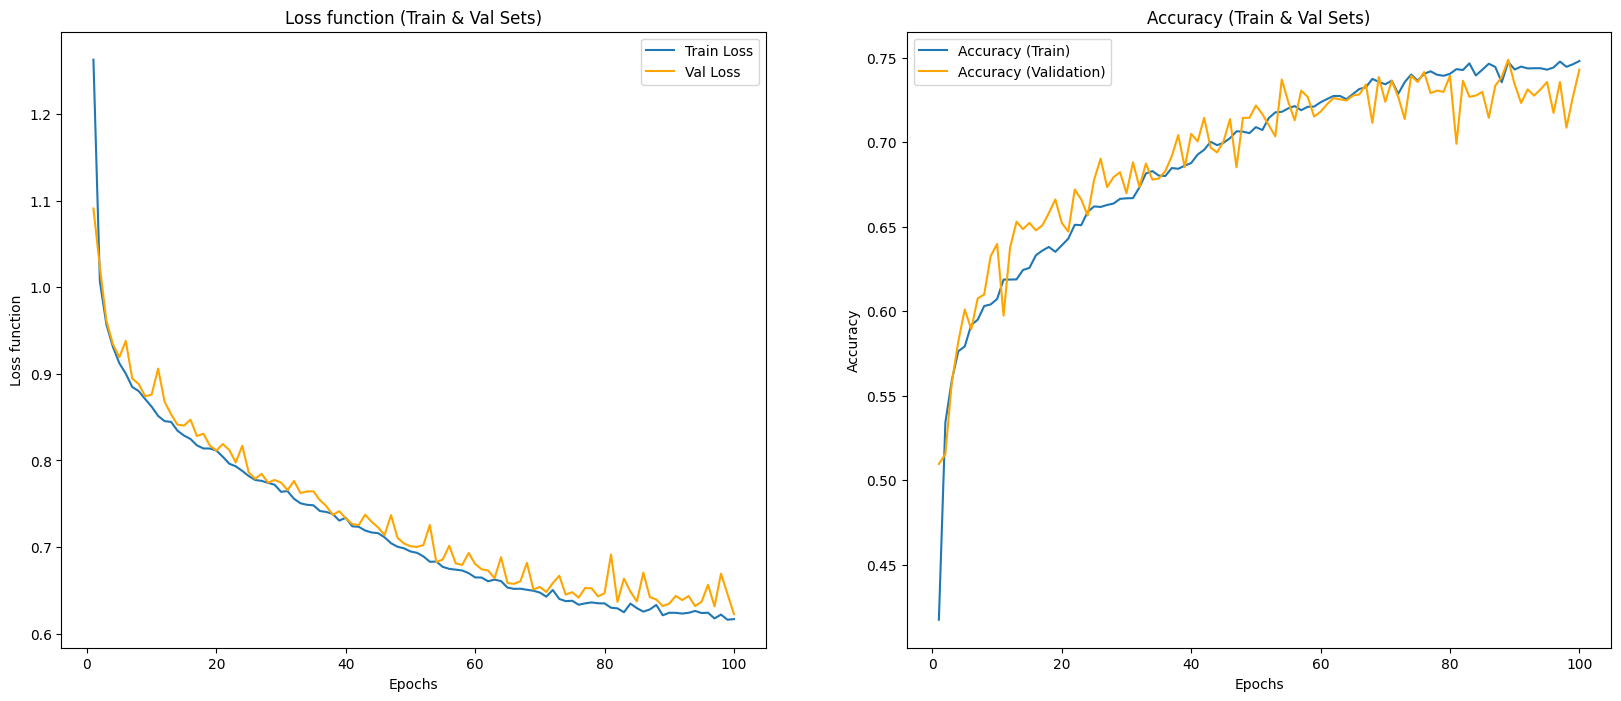

In [ ]:
plt.figure(figsize=(20,8))
loss_function = history.history['loss']
val_loss_function = history.history['val_loss']
epochs = range(1,len(loss_function)+1)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.subplot(1, 2, 1)
plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
probs = model.predict(X_test)
truth = np.argmax(y_test, axis=1)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
predicted = np.argmax(probs, axis=1)

In [ ]:
df_metrics_multi = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
recall = round(recall_score(truth, predicted, average='macro'), 4)
precision = round(precision_score(truth, predicted, average='macro'), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, predicted), 4)
auc = round(roc_auc_score(truth, probs, average='macro', multi_class='ovr'), 4)
df_metrics_multi.loc[len(df_metrics_multi.index)] = ['base_model', recall, precision, weighted_accuracy, auc]

### model,recall,precision,weighted_accuracy,auc

In [ ]:
df_metrics_multi

,model,recall,precision,weighted_accuracy,auc
0,base_model,0.7568,0.7646,0.7568,0.9242


### Вторая модель

In [ ]:
input_features = X_train.shape[1]
num_classes = y_train.shape[1]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
model2 = Sequential()

model2.add(Dense(128, activation='relu', input_dim=input_features))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(num_classes, activation='softmax'))

model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,900 (50.39 KB)

 Trainable params: 12,452 (48.64 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)


callbacks = [early_stop, checkpoint]

In [ ]:
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3904 - loss: 1.4635
Epoch 1: val_loss improved from inf to 1.30713, saving model to best_model.keras
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3906 - loss: 1.4628 - val_accuracy: 0.3258 - val_loss: 1.3071
Epoch 2/100
290/293 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5151 - loss: 1.0572
Epoch 2: val_loss improved from 1.30713 to 0.97333, saving model to best_model.keras
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5153 - loss: 1.0569 - val_accuracy: 0.5871 - val_loss: 0.9733
Epoch 3/100
280/293 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5437 - loss: 0.9908
Epoch 3: val_loss improved from 0.97333 to 0.87634, saving model to best_model.keras
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5442 - loss: 0.9901 - val_accuracy: 0.6288 - val_loss: 0.8763
Epoch 4/100
290/293 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5637 - loss: 0.9545
Epoch 4: val_loss improved from 0.87634 to 0.87233

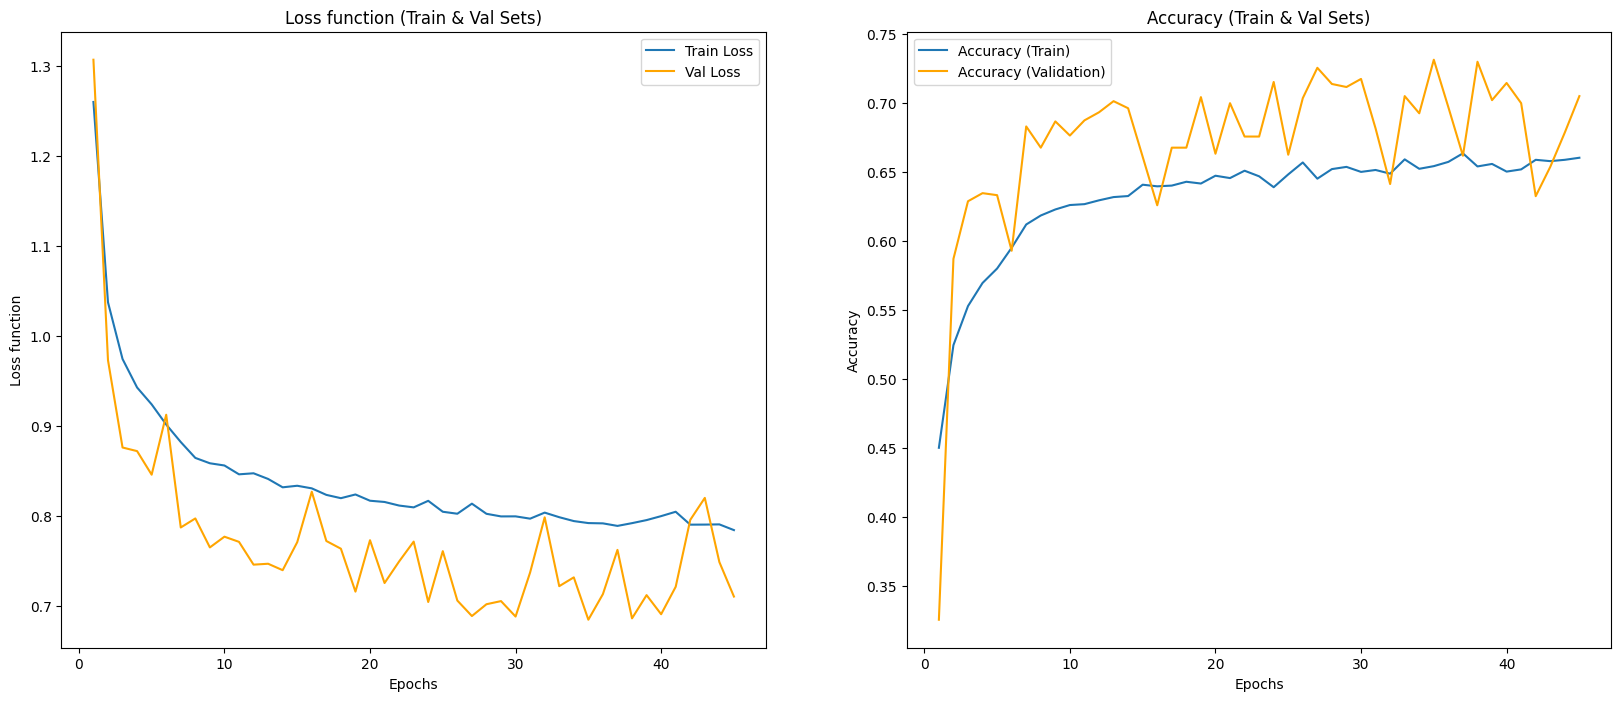

In [ ]:
plt.figure(figsize=(20,8))
loss_function = history2.history['loss']
val_loss_function = history2.history['val_loss']
epochs = range(1,len(loss_function)+1)

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.subplot(1, 2, 1)
plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
df_metrics_multi = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])
probs2 = model2.predict(X_test)
truth = np.argmax(y_test, axis=1)
predicted2 = np.argmax(probs2, axis=1)

recall = round(recall_score(truth, predicted2, average='macro'), 4)
precision = round(precision_score(truth, predicted2, average='macro'), 4)
weighted_accuracy = round(balanced_accuracy_score(truth, predicted2), 4)
auc = round(roc_auc_score(truth, probs2, average='macro', multi_class='ovr'), 4)

df_metrics_multi.loc[len(df_metrics_multi.index)] = ['model2', recall, precision, weighted_accuracy, auc]


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


### model2, recall, precision, weighted_accuracy, auc

In [ ]:
df_metrics_multi

,model,recall,precision,weighted_accuracy,auc
0,model2,0.7357,0.744,0.7357,0.9139


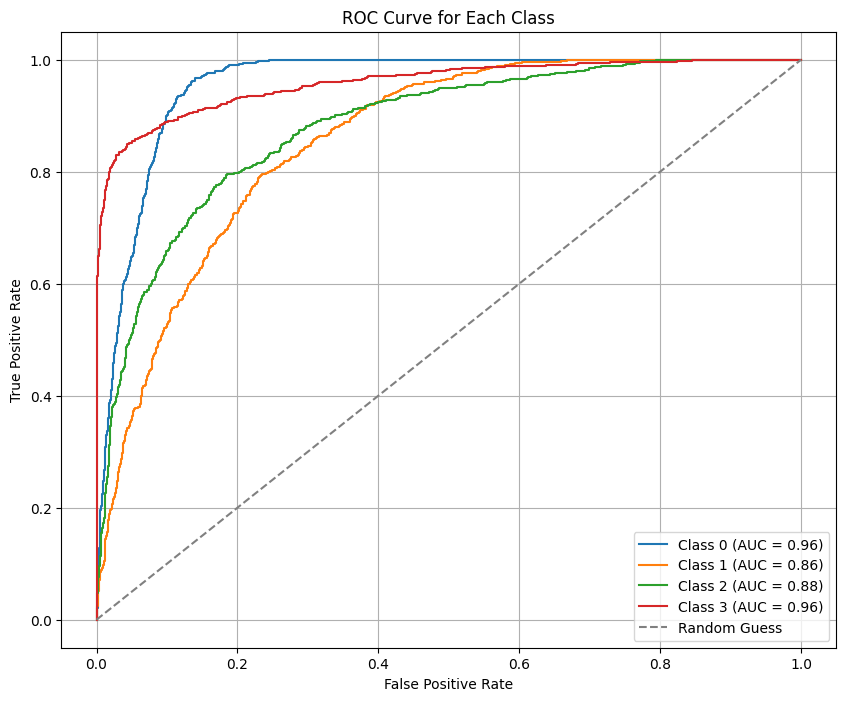

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
y_test_one_hot = y_test


num_classes = y_test_one_hot.shape[1]
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## 3.Регрессор

In [ ]:
file_path = '/content/drive/MyDrive/winequality-white.csv'
data = pd.read_csv(file_path,sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#Проверить, нет ли недостающих данных
# data.isnull().sum()/df.shape[0]
data.isnull().sum()/data.shape[0]

,0
fixed acidity,0.0
volatile acidity,0.0
citric acid,0.0
residual sugar,0.0
chlorides,0.0
free sulfur dioxide,0.0
total sulfur dioxide,0.0
density,0.0
pH,0.0
sulphates,0.0


In [ ]:
data.shape

(4898, 12)

In [ ]:
# Наборов данных который использовались

df = data
lis= df.columns
lis = list(lis)
lis.pop(0)
print(len(lis), 'columns')
print()
for i in lis:
  print(i)

11 columns

volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [ ]:
df = data

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):  # Cek jika kolom bertipe numerik
        min_value = df[col].min()
        max_value = df[col].max()
        print(f"Kolom {col}: ({min_value}; {max_value})")
    # else:
    #     print(f"Kolom {col}: Bukan tipe numerik")

Kolom fixed acidity: (3.8; 14.2)
Kolom volatile acidity: (0.08; 1.1)
Kolom citric acid: (0.0; 1.66)
Kolom residual sugar: (0.6; 65.8)
Kolom chlorides: (0.009; 0.346)
Kolom free sulfur dioxide: (2.0; 289.0)
Kolom total sulfur dioxide: (9.0; 440.0)
Kolom density: (0.98711; 1.03898)
Kolom pH: (2.72; 3.82)
Kolom sulphates: (0.22; 1.08)
Kolom alcohol: (8.0; 14.2)
Kolom quality: (3; 9)


In [ ]:

for i in lis:
    val_col = data[i].value_counts()
    print(val_col)
    print('='*80)

volatile acidity
0.280    263
0.240    253
0.260    240
0.250    231
0.220    229
        ... 
0.545      1
0.135      1
0.905      1
0.685      1
0.355      1
Name: count, Length: 125, dtype: int64
citric acid
0.30    307
0.28    282
0.32    257
0.34    225
0.29    223
       ... 
1.66      1
1.23      1
0.86      1
0.11      1
0.99      1
Name: count, Length: 87, dtype: int64
residual sugar
1.20     187
1.40     184
1.60     165
1.30     147
1.10     146
        ... 
6.75       1
12.75      1
8.55       1
4.35       1
18.40      1
Name: count, Length: 310, dtype: int64
chlorides
0.044    201
0.036    200
0.042    184
0.040    182
0.046    181
        ... 
0.217      1
0.148      1
0.158      1
0.099      1
0.136      1
Name: count, Length: 160, dtype: int64
free sulfur dioxide
29.0     160
31.0     132
26.0     129
35.0     129
34.0     128
        ... 
110.0      1
42.5       1
40.5       1
19.5       1
97.0       1
Name: count, Length: 132, dtype: int64
total sulfur dioxide
111.0  

In [ ]:
X = data.drop(columns=["quality"])
y = data["quality"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Первая модель

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 19.5952 - mae: 4.0368 - val_loss: 3.0449 - val_mae: 1.3874
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2699 - mae: 1.3913 - val_loss: 2.1499 - val_mae: 1.1520
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4964 - mae: 1.2271 - val_loss: 1.7518 - val_mae: 1.0372
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2183 - mae: 1.1355 - val_loss: 1.4621 - val_mae: 0.9436
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7104 - mae: 1.0327 - val_loss: 1.2127 - val_mae: 0.8685
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4635 - mae: 0.9475 - val_loss: 1.0514 - val_mae: 0.8075
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2733 - mae: 0.8725 - val_loss: 0.9313 - val_mae: 0.7595
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1932 - mae: 0.8467 - val_loss: 0.7884 - val_mae: 0.6928
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - l

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Результаты оценки на тестовом наборе данных: MSE={mse:.2f}, MAE={mae:.2f}, R2={r2:.2f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Результаты оценки на тестовом наборе данных: MSE=0.46, MAE=0.53, R2=0.35


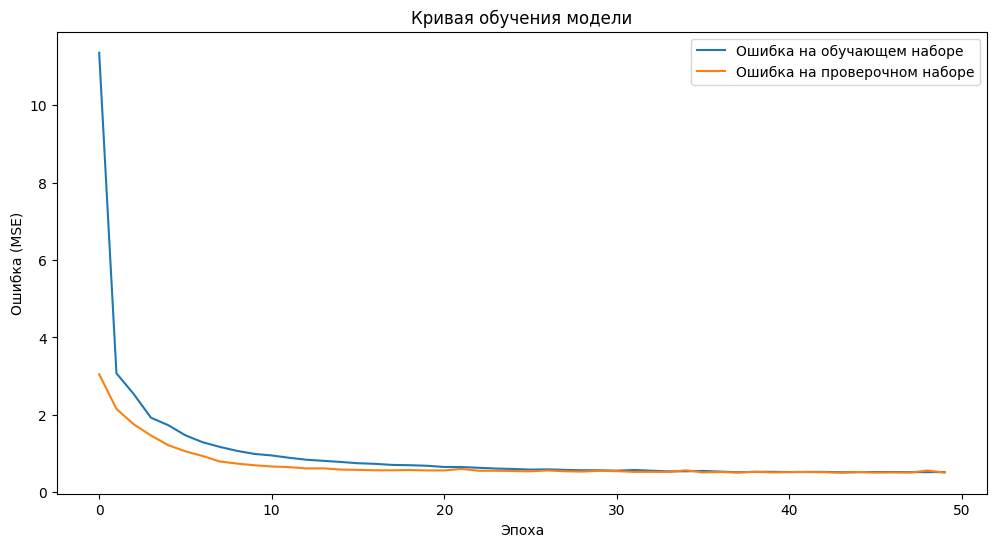

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка (MSE)')
plt.title('Кривая обучения модели')
plt.legend()
plt.show()

### Вторая модель

In [ ]:
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
 model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

history = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)


Epoch 1/100
 97/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.0708 - mae: 3.4617
Epoch 1: val_loss improved from inf to 2.33349, saving model to best_model.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 15.1699 - mae: 3.3226 - val_loss: 2.3335 - val_mae: 1.2227
Epoch 2/100
100/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4197 - mae: 1.2285
Epoch 2: val_loss improved from 2.33349 to 1.67277, saving model to best_model.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4211 - mae: 1.2267 - val_loss: 1.6728 - val_mae: 1.0224
Epoch 3/100
102/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9673 - mae: 1.0782
Epoch 3: val_loss improved from 1.67277 to 1.22671, saving model to best_model.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9567 - mae: 1.0758 - val_loss: 1.2267 - val_mae: 0.8760
Epoch 4/100
104/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5356 - mae: 0.9355
Epoch 4: val_loss improved from 1.22671 to 0.96208, saving model to best_model.keras
108/108 ━━━━━

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Результаты оценки на тестовом наборе данных: MSE=0.43, MAE=0.52, R2=0.38


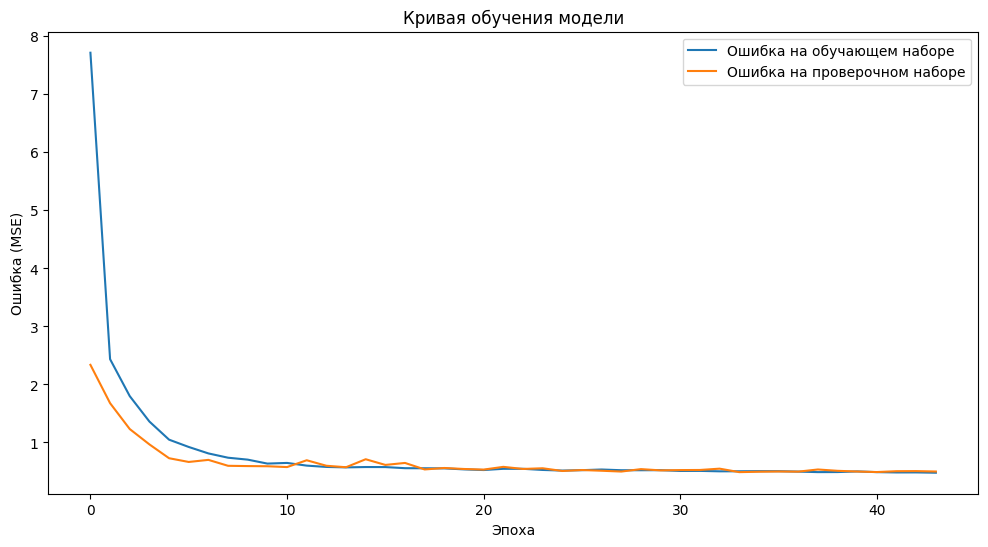

In [ ]:
import tensorflow as tf

# Загрузка лучшей сохраненной модели
best_model = tf.keras.models.load_model('best_model.keras')
y_pred = best_model.predict(X_test)

# Подсчет метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Печать результатов оценки
print(f"Результаты оценки на тестовом наборе данных: MSE={mse:.2f}, MAE={mae:.2f}, R2={r2:.2f}")

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка (MSE)')
plt.title('Кривая обучения модели')
plt.legend()
plt.show()